In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
path='ex2data2.txt'
data=pd.read_csv(path,names=['Test 1','Test 2','Accepted'])
data.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


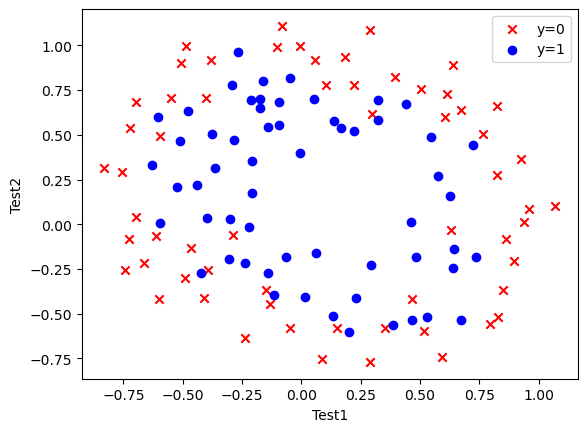

In [7]:
fig,ax=plt.subplots()
ax.scatter(data[data['Accepted']==0]['Test 1'],data[data['Accepted']==0]['Test 2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Test 1'],data[data['Accepted']==1]['Test 2'],c='b',marker='o',label='y=1')
ax.legend()

ax.set(xlabel='Test1',
      ylabel='Test2')
plt.show()

### 特征映射

In [23]:
def feature_mapping(x, y, power, as_ndarray=False):
    data = {'f{0}{1}'.format(i-p, p): np.power(x, i-p) * np.power(y, p)
                for i in range(0, power+1)
                for p in range(0, i+1)
           }
    if as_ndarray:
        return pd.DataFrame(data).values
    else:
        return pd.DataFrame(data)     

In [28]:
x1 = Test1.values
x2 = Test2.values
Y =  Accepted

NameError: name 'Test1' is not defined

In [29]:
data2 = feature_mapping(x1, x2, power=6)
# data = data.sort_index(axis=1, ascending=True)
data2.head()

,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [30]:
X=data2.values

In [31]:
X.shape

(118, 28)

In [32]:
y=data.iloc[:,-1].values

In [33]:
y=y.reshape(len(y),1)
y.shape

(118, 1)

In [34]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [42]:
def costFunction(X,y,theta,lr):
    A=sigmoid(X@theta)
    first=y*np.log(A)
    second=(1-y)*np.log(1-A)
    
    reg=np.sum(np.power(theta[1:],2))*(lr/2*len(X))
    
    return -np.sum(first+second)/len(X)+reg

In [43]:
theta=np.zeros((28,1))
theta.shape

(28, 1)

In [44]:
lamda=1

In [45]:
cost_init=costFunction(X,y,theta,lamda)
print(cost_init)

0.6931471805599455


In [46]:
def gradientDescent(X,y,theta,alpha,iters,lr):
    costs = []
    
    for i in range(iters):
        reg=theta[1:]*(lr/len(X))
        reg=np.insert(reg,0,values,axis=0)
        
        
        A=sigmoid(X@theta)
        theta = theta - (alpha/m)*X.T@(A-y)
        cost = costFunction(X,y,theta)
        costs.append(cost)
        
        if i % 1000 == 0:
            print(cost)
            
    return theta,costs

In [47]:
alpha=0.001
iters=100000
lamda=0.001

In [49]:
theta_final,costs=gradientDescent(X,y,theta,alpha,iters,lamda)

NameError: name 'values' is not defined

In [50]:
def predict(X,theta):
    prob=sigmoid(X@theta)
    return [1 if x>=0.5 else 0 for x in prob]

In [51]:
y_=np.array(predict(X,theta_final))
y_pre=y_.reshape(len(y_),1)

acc=np.mean(y_pre==y)

print(acc)

NameError: name 'theta_final' is not defined

In [53]:
x=np.linspace(-1.2,1.2,200)
xx,yy=np.meshgrid(x,x)
z=feature_mapping(xx.ravel(),yy.ravel(),6).values

zz=z@theta_final
zz=zz.reshape(xx.shape)

fig,ax=plt.subplots()
ax.scatter(data[data['Accepted']==0]['Test 1'],data[data['Accepted']==0]['Test 2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Test 1'],data[data['Accepted']==1]['Test 2'],c='b',marker='o',label='y=1')
ax.legend()

ax.set(xlabel='Test1',
      ylabel='Test2')
plt.show()

plt.contour(xx,yy,zz,0)

plt.contour(xx,yy,zz,0)

NameError: name 'theta_final' is not defined